k-means clustering

In [1]:
##importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as mlp
import pandas as pd

In [3]:
##importing the dataset

In [5]:
customer= pd.read_csv("C:\\Users\\Dell\\Desktop\\Mall_Customers.csv")

In [7]:
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
x = customer.iloc[:, [3, 4]].values

In [12]:
## using the elbow method to find the optimal number of cluster

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


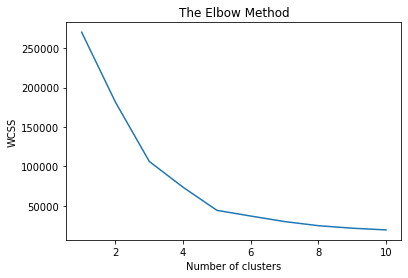

Wall time: 3.6 s


In [14]:
%%time
from sklearn.cluster import KMeans
wcss = []#waited cluster sample(wcss)
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
mlp.plot(range(1, 11), wcss)
mlp.title('The Elbow Method')
mlp.xlabel('Number of clusters')
mlp.ylabel('WCSS')
mlp.show()

In [15]:
##TRAINING THE K-MEANS ON A DATASET

In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

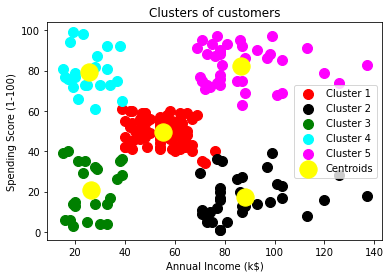

Wall time: 1.49 s


In [18]:
%%time
mlp.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
mlp.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'black', label = 'Cluster 2')
mlp.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
mlp.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
mlp.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
mlp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
mlp.title('Clusters of customers')
mlp.xlabel('Annual Income (k$)')
mlp.ylabel('Spending Score (1-100)')
mlp.legend()
mlp.show()